# Code Adapted From https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance

In [3]:
# Solve with inverse
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# Solve with pseudo inverse
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [7]:
# Full batch gradient descent
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
# Interesting note that newton-raphson converges in a single step as expected (since the loss function is quadratic in B and the hessian is positive definite)

In [11]:
# Polynomial regression, this just creates more features easily
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[7.49080238e-01, 5.61121203e-01],
       [1.90142861e+00, 3.61543077e+00],
       [1.46398788e+00, 2.14326052e+00],
       [1.19731697e+00, 1.43356792e+00],
       [3.12037281e-01, 9.73672647e-02],
       [3.11989041e-01, 9.73371615e-02],
       [1.16167224e-01, 1.34948240e-02],
       [1.73235229e+00, 3.00104446e+00],
       [1.20223002e+00, 1.44535703e+00],
       [1.41614516e+00, 2.00546710e+00],
       [4.11689886e-02, 1.69488562e-03],
       [1.93981970e+00, 3.76290049e+00],
       [1.66488528e+00, 2.77184300e+00],
       [4.24678221e-01, 1.80351592e-01],
       [3.63649934e-01, 1.32241275e-01],
       [3.66809020e-01, 1.34548857e-01],
       [6.08484486e-01, 3.70253370e-01],
       [1.04951286e+00, 1.10147725e+00],
       [8.63890037e-01, 7.46305997e-01],
       [5.82458280e-01, 3.39257648e-01],
       [1.22370579e+00, 1.49745586e+00],
       [2.78987721e-01, 7.78341486e-02],
       [5.84289297e-01, 3.41393983e-01],
       [7.32723687e-01, 5.36884001e-01],
       [9.121399

In [51]:
# Regularizations 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

lin_reg = LinearRegression()
lin_reg.fit(X, y)
X_new = np.array([[0], [2]])
pred_lin = lin_reg.predict(X_new)

ridge_reg = Ridge(alpha=100, solver="cholesky")
ridge_reg.fit(X, y)
pred_ridge = ridge_reg.predict(X_new)

lasso_reg = Lasso(alpha=100/(2*len(X)))
lasso_reg.fit(X, y)
pred_lasso = lasso_reg.predict(X_new)

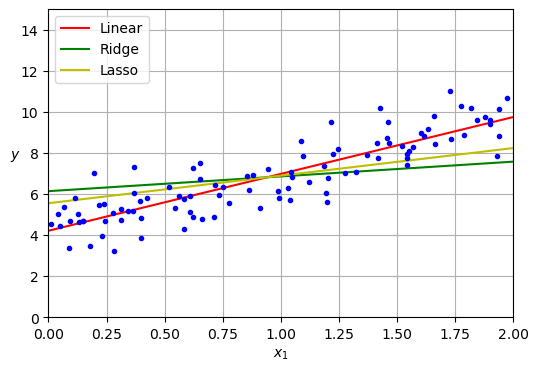

In [57]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, pred_lin, "r-", label="Linear")
plt.plot(X_new, pred_ridge, "g-", label="Ridge")
plt.plot(X_new, pred_lasso, "y-", label="Lasso")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()